In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [117]:
df=pd.read_csv("C:\\Users\\kurch\\OneDrive\\Documents\\Mall_customer_segmentation\\Mall_Customers.csv")

In [118]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariable Analysis

In [119]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


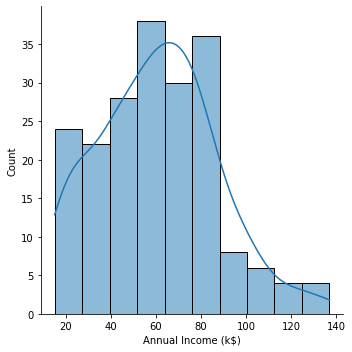

In [120]:
sns.displot(df['Annual Income (k$)'],kde=True);

In [121]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [122]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

<Figure size 432x288 with 0 Axes>

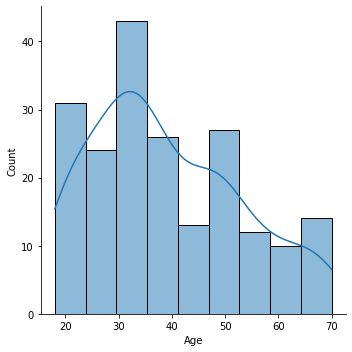

<Figure size 432x288 with 0 Axes>

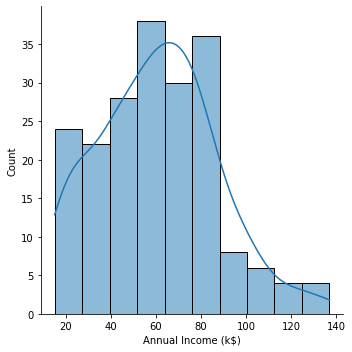

<Figure size 432x288 with 0 Axes>

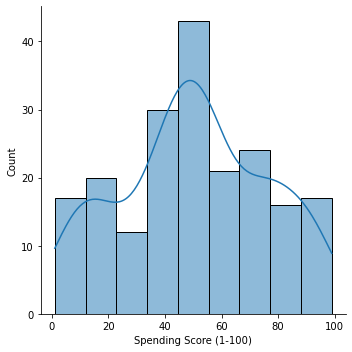

In [123]:
for i in columns:
    plt.figure()
    sns.displot(df[i],kde=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

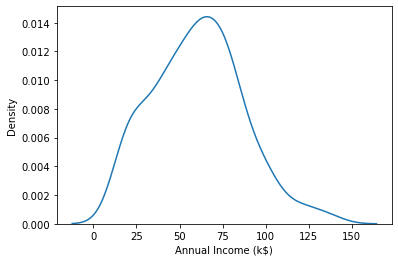

In [124]:
sns.kdeplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

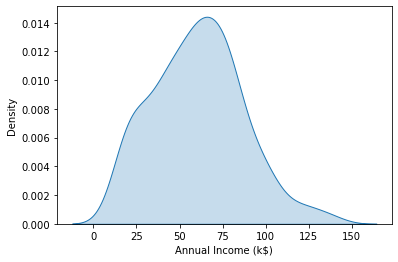

In [125]:
sns.kdeplot(df['Annual Income (k$)'], shade=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

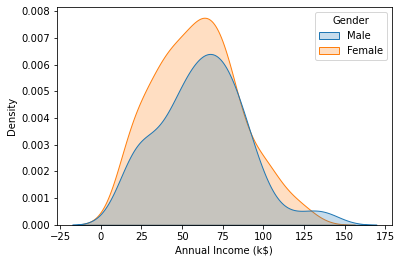

In [126]:
sns.kdeplot(df['Annual Income (k$)'], shade=True, hue=df['Gender'])

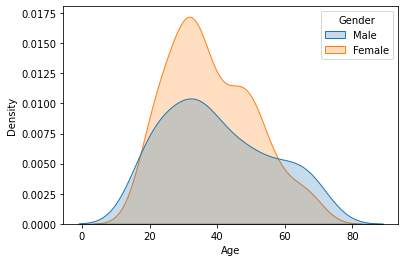

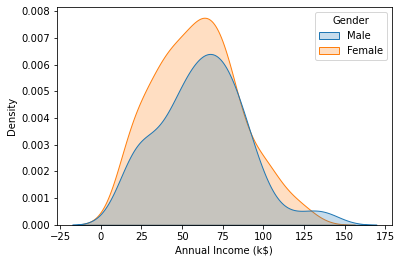

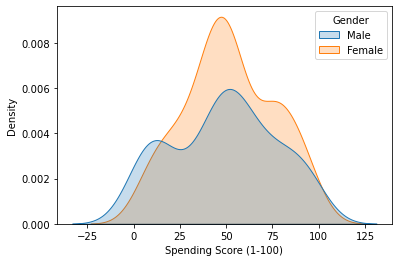

In [127]:
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade=True, hue=df['Gender'])

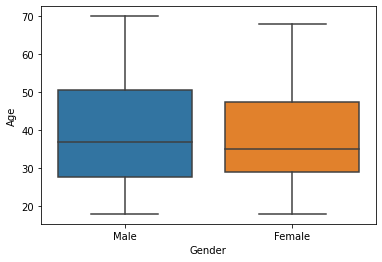

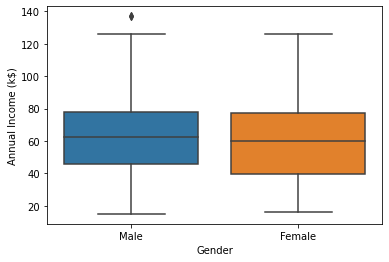

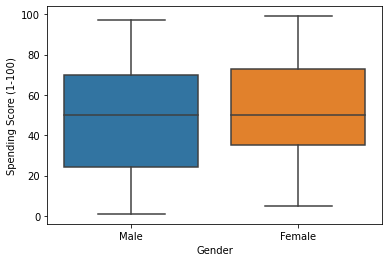

In [128]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [129]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [130]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

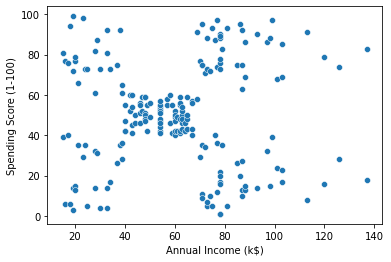

In [131]:
sns.scatterplot(data= df, x='Annual Income (k$)', y='Spending Score (1-100)')

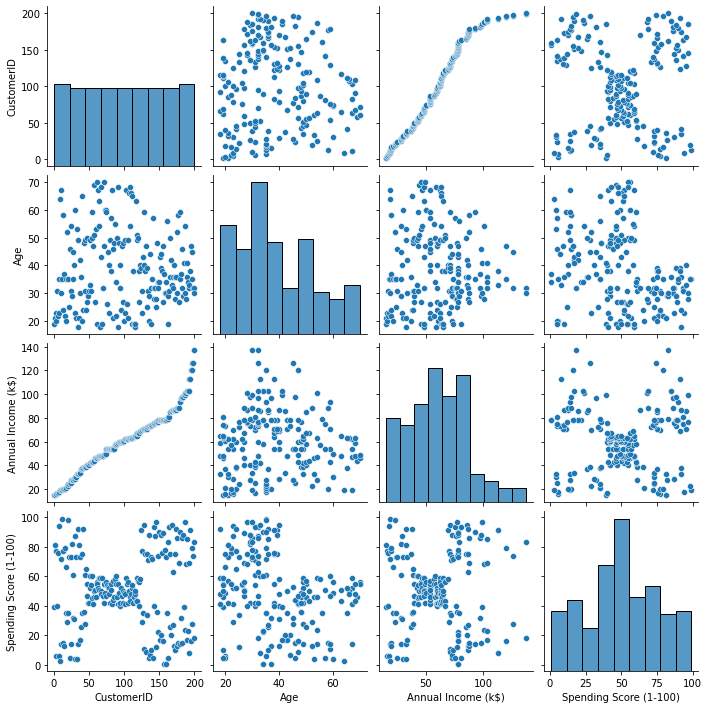

In [132]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df)

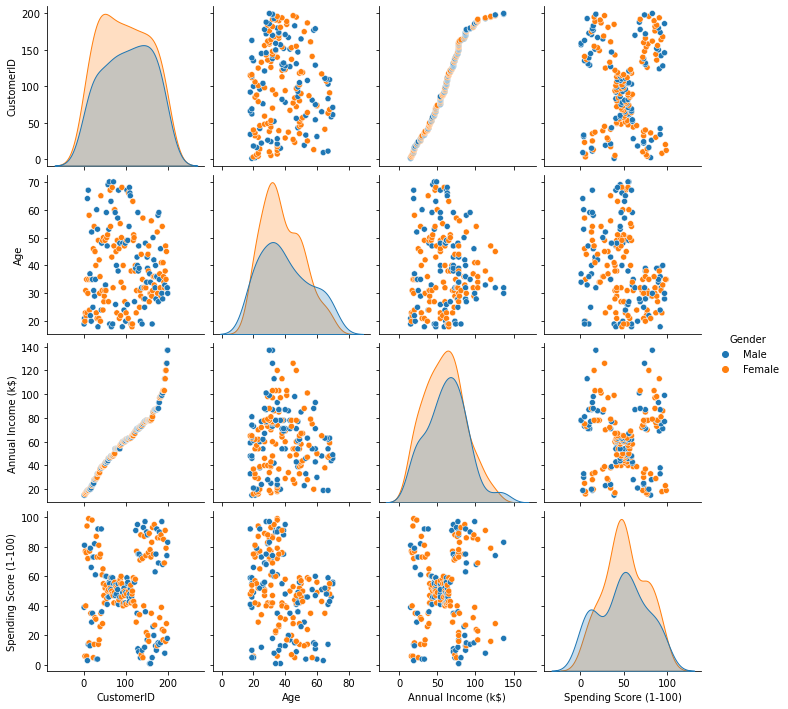

In [133]:
sns.pairplot(df, hue="Gender")

In [166]:
df.groupby(['Gender'])['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [135]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

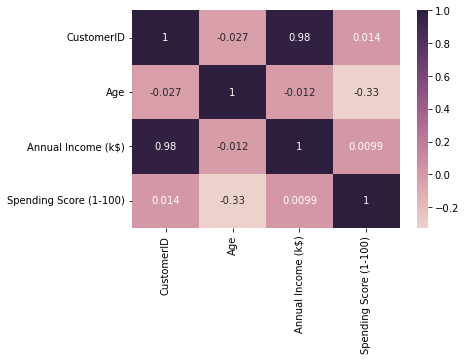

In [136]:
sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

# Clustering - Univariate, Bivariate, Multivariate

### Univariate

In [155]:
clustering1=KMeans(6)# here we can pass the number of clusters

In [156]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [158]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3])

In [159]:
df['Income Cluster']=clustering1.labels_

In [160]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [161]:
df['Income Cluster'].value_counts()

0    48
4    42
5    42
2    32
1    28
3     8
Name: Income Cluster, dtype: int64

In [162]:
clustering1.inertia_

5050.904761904763

In [167]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Income Cluster']])
    inertia_scores.append(kmeans.inertia_)

In [168]:
inertia_scores

[729.8199999999996,
 115.06441223832533,
 45.0842105263158,
 21.65333333333332,
 6.3999999999999995,
 1.5294040799972366e-28,
 1.0560875368646296e-28,
 1.0560875368646296e-28,
 1.0560875368646296e-28,
 1.0560875368646296e-28]

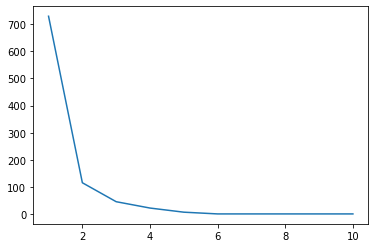

In [170]:
plt.plot(range(1,11), inertia_scores)# we see that elbow starts approximately at x=3

In [171]:
clustering1=KMeans(3)# here we can pass the number of clusters( that we gain from previous measure)

In [172]:
clustering1.fit(df[['Annual Income (k$)']])
df['Income Cluster']=clustering1.labels_
clustering1.inertia_

23517.330930930926

In [174]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [175]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


### Bivariate

In [177]:
clustering2=KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


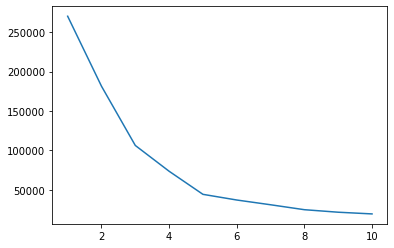

In [178]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)#elbow around 5

In [179]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

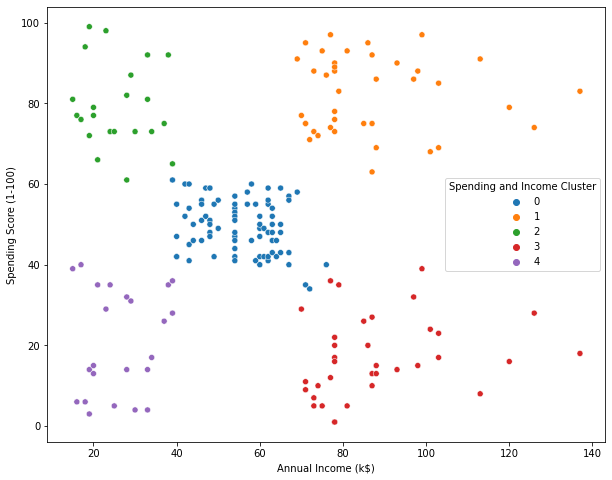

In [183]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

In [184]:
clustering2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [186]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers

,0,1
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [192]:
centers.columns=['x','y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

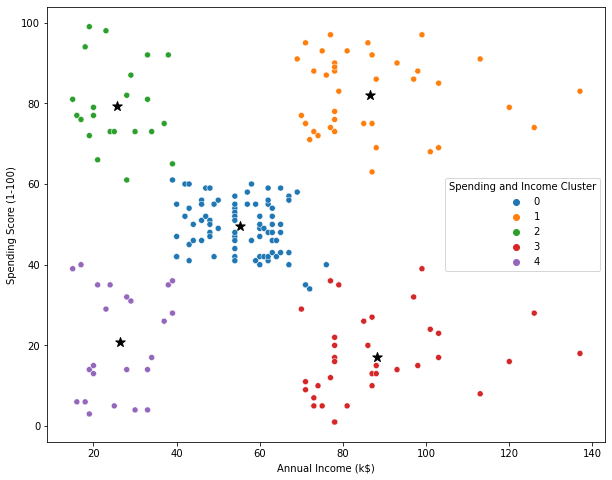

In [200]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

In [201]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


### Multivariate clustering

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
scale=StandardScaler()

In [207]:
dff=pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,1
1,2,21,15,81,1,2,1
2,3,20,16,6,1,4,0
3,4,23,16,77,1,2,0
4,5,31,17,40,1,4,0


In [208]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [210]:
dff=scale.fit_transform(dff)
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


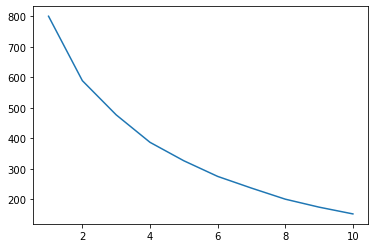

In [212]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)#about 4...

In [213]:
df_age=df

In [214]:
df_age['AgeGroup']="age"

In [215]:
for i in range(len(df)):
    if df_age["Age"][i]<20 :
        df_age['AgeGroup'][i]='before 20'

    elif df_age["Age"][i]<40 and df["Age"][i]>=20:
        df_age['AgeGroup'][i]='20-40'

    elif df_age["Age"][i]>=40:
        df_age['AgeGroup'][i]='Under 40'


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

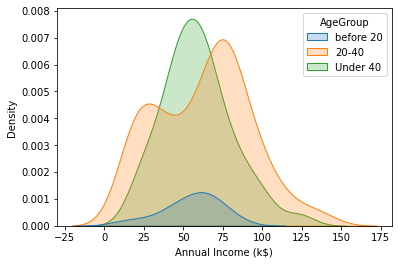

In [216]:
sns.kdeplot(df_age['Annual Income (k$)'], shade=True, hue=df['AgeGroup'])